# MNS - Biological Plausible Deep Learning
## Visualization Notebook - Get Results Ready for Report

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import os
# Import log-helper/learning plot functions
from utils.helpers import *
from utils.logger import *
from utils.plotting import *

In [2]:
fig_dir = os.getcwd() +"/figures"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print("Created New Figures Directory")
    
log_dir = os.getcwd() + "/logs"

In [3]:
download_data()

No download of MNIST needed.
No download of Fashion-MNIST needed.
No download of CIFAR-10 needed.


In [4]:
# MNIST dataset
X_mnist, y_mnist = get_data(num_samples=70000, dataset="mnist")
# MNIST dataset
X_fashion, y_fashion = get_data(num_samples=70000, dataset="fashion")
# MNIST dataset
X_cifar10, y_cifar10 = get_data(num_samples=60000, dataset="cifar10")

# Visualize the Datasets

In [6]:
mnist_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
cifar10_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Saved figure to /Users/rtl/Dropbox/PHD_ECN/COURSES/WiSe_2018_Models_of_Neural_Systems/PROJECT/CODE/figures/mnist.png


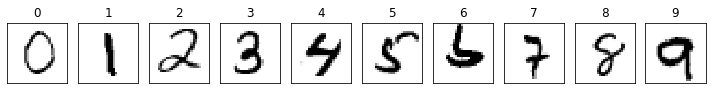

In [7]:
plot_labels(X_mnist, y_mnist, mnist_labels,
            save_fname=fig_dir + "/mnist.png")

Saved figure to /Users/rtl/Dropbox/PHD_ECN/COURSES/WiSe_2018_Models_of_Neural_Systems/PROJECT/CODE/figures/fashion.png


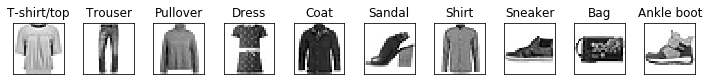

In [8]:
plot_labels(X_fashion, y_fashion, fashion_labels,
            save_fname=fig_dir + "/fashion.png")

Saved figure to /Users/rtl/Dropbox/PHD_ECN/COURSES/WiSe_2018_Models_of_Neural_Systems/PROJECT/CODE/figures/cifar10.png


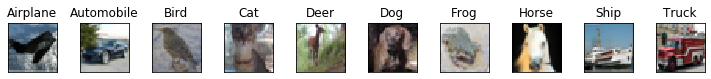

In [9]:
plot_labels(X_cifar10, y_cifar10, cifar10_labels,
            save_fname=fig_dir + "/cifar10.png")

# Visualize the Learning Performance for all Datasets

In [5]:
# Load in the data from the result files
log_mnist_dnn = os.getcwd() + "/logs/log_mnist_dnn"
log_fashion_dnn = os.getcwd() + "/logs/log_fashion_dnn"
log_cifar10_dnn = os.getcwd() + "/logs/log_cifar10_dnn"

log_fnames_dnn = [log_mnist_dnn, log_fashion_dnn, log_cifar10_dnn]
its_dnn, train_losses_dnn, val_losses_dnn, train_accs_dnn, val_accs_dnn = process_logger_learning(log_fnames_dnn)

log_mnist_comp_dnn = os.getcwd() + "/logs/log_mnist_guergiev.pkl"
log_fashion_comp_dnn = os.getcwd() + "/logs/log_fashion_guergiev.pkl"
log_cifar10_comp_dnn = os.getcwd() + "/logs/log_cifar10_guergiev.pkl"

log_fnames_comp_dnn = [log_mnist_comp_dnn, log_fashion_comp_dnn, log_cifar10_comp_dnn]
its_comp_dnn, train_losses_comp_dnn, val_losses_comp_dnn, train_accs_comp_dnn, val_accs_comp_dnn = process_guergiev_logger(log_fnames_comp_dnn, "performance")

# log_mnist_cnn = os.getcwd() + "/logs/log_mnist_cnn"
# log_fashion_cnn = os.getcwd() + "/logs/log_fashion_cnn"
# log_cifar10_cnn = os.getcwd() + "/logs/log_cifar10_cnn"

# log_fnames_cnn = [log_mnist_cnn, log_fashion_cnn, log_cifar10_cnn]
# its_cnn, train_losses_cnn, val_losses_cnn, train_accs_cnn, val_accs_cnn = process_logger_learning(log_fnames_cnn)

In [6]:
sub_titles = ["MNIST: DNN (784-500-10)",
              "Fashion-MNIST: DNN (784-500-10)",
              "CIFAR-10: DNN (3072-500-10)"]

labels = ["BP-MLP: Train", "BP-MLP: Val.",
          "Comp-MLP: Train", "Comp-MLP: Val.",
          "BP-CNN: Train", "BP-CNN: Val."]

# Later on - Add cnn to list comprehension
iters = [[its_dnn[i], its_comp_dnn[i]] for i in range(3)]
train_accs = [[train_accs_dnn[i], train_accs_comp_dnn[i]] for i in range(3)]
val_accs = [[val_accs_dnn[i], val_accs_comp_dnn[i]] for i in range(3)]
train_losses = [[train_losses_dnn[i], train_losses_comp_dnn[i]] for i in range(3)]
val_losses = [[val_losses_dnn[i], val_losses_comp_dnn[i]] for i in range(3)]

Saved figure to /Users/rtl/Dropbox/PHD_ECN/PROJECTS/Bio-DRL/CODE/figures/learning.png


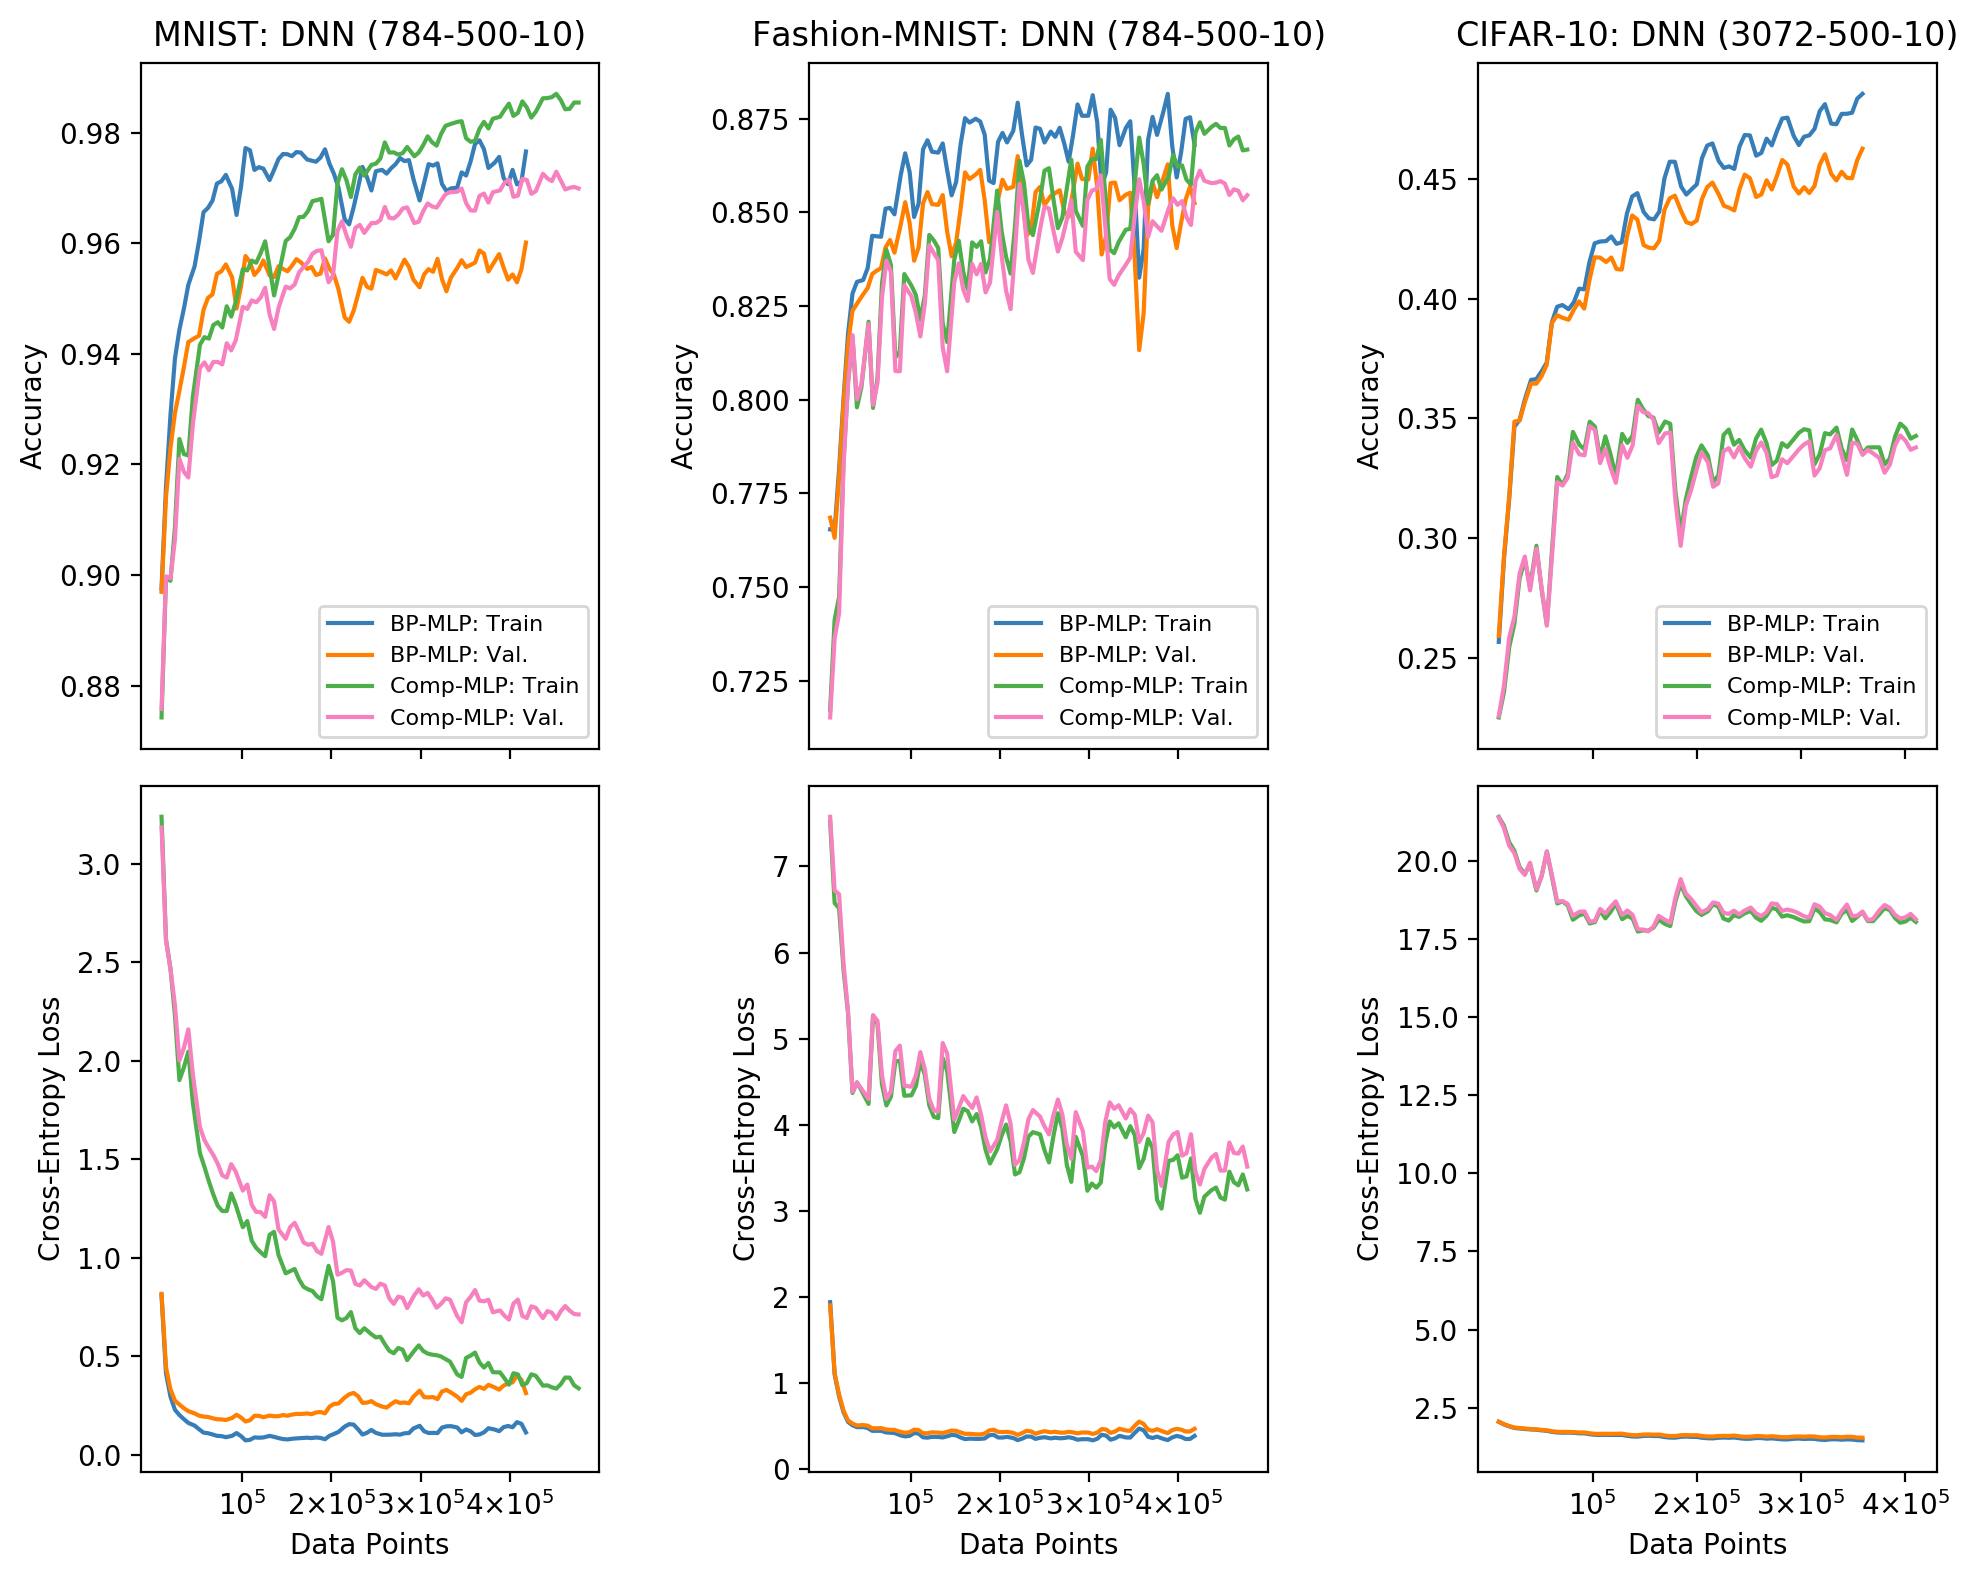

In [7]:
plot_all_learning(iters, train_accs, val_accs, train_losses, val_losses,
                  2, sub_titles, labels, save_fname=fig_dir + "/learning.png")

# Visualize the Weight Dynamics throughout Learning

In [8]:
wlog_mnist_dnn = os.getcwd() + "/logs/weight_log_mnist_dnn.pkl"
wlog_fashion_dnn = os.getcwd() + "/logs/weight_log_fashion_dnn.pkl"
wlog_cifar10_dnn = os.getcwd() + "/logs/weight_log_cifar10_dnn.pkl"

wlog_fnames_dnn = [wlog_mnist_dnn, wlog_fashion_dnn, wlog_cifar10_dnn]
its_dnn, dnn_w, dnn_w_ch, dnn_w_grad_ch, dnn_b, dnn_b_ch, dnn_b_grad_ch = process_logger_weights(wlog_fnames_dnn)

wlog_mnist_comp_dnn = os.getcwd() + "/logs/weight_log_mnist_guergiev.pkl"
wlog_fashion_comp_dnn = os.getcwd() + "/logs/weight_log_fashion_guergiev.pkl"
wlog_cifar10_comp_dnn = os.getcwd() + "/logs/weight_log_cifar10_guergiev.pkl"

wlog_fnames_comp_dnn = [wlog_mnist_comp_dnn, wlog_fashion_comp_dnn, wlog_cifar10_comp_dnn]
its_comp_dnn, comp_dnn_w, comp_dnn_w_ch, comp_dnn_w_grad_ch = process_guergiev_logger(wlog_fnames_comp_dnn, "weights")

In [9]:
sub_titles = ["MNIST: DNN (784-500-10)",
              "Fashion-MNIST: DNN (784-500-10)",
              "CIFAR-10: DNN (3072-500-10)"]

labels = ["BP-MLP", "Comp-MLP: Train"]

# Later on - Add cnn to list comprehension
iters = [[its_dnn[i], its_comp_dnn[i]] for i in range(3)]
fr_n_weights = [[dnn_w[i], comp_dnn_w[i]] for i in range(3)]
fr_n_weights_ch = [[dnn_w_ch[i], comp_dnn_w_ch[i]] for i in range(3)]
fr_n_weights_grad_ch = [[dnn_w_grad_ch[i], comp_dnn_w_grad_ch[i]] for i in range(3)]

Saved figure to /Users/rtl/Dropbox/PHD_ECN/PROJECTS/Bio-DRL/CODE/figures/dynamics_l0.png


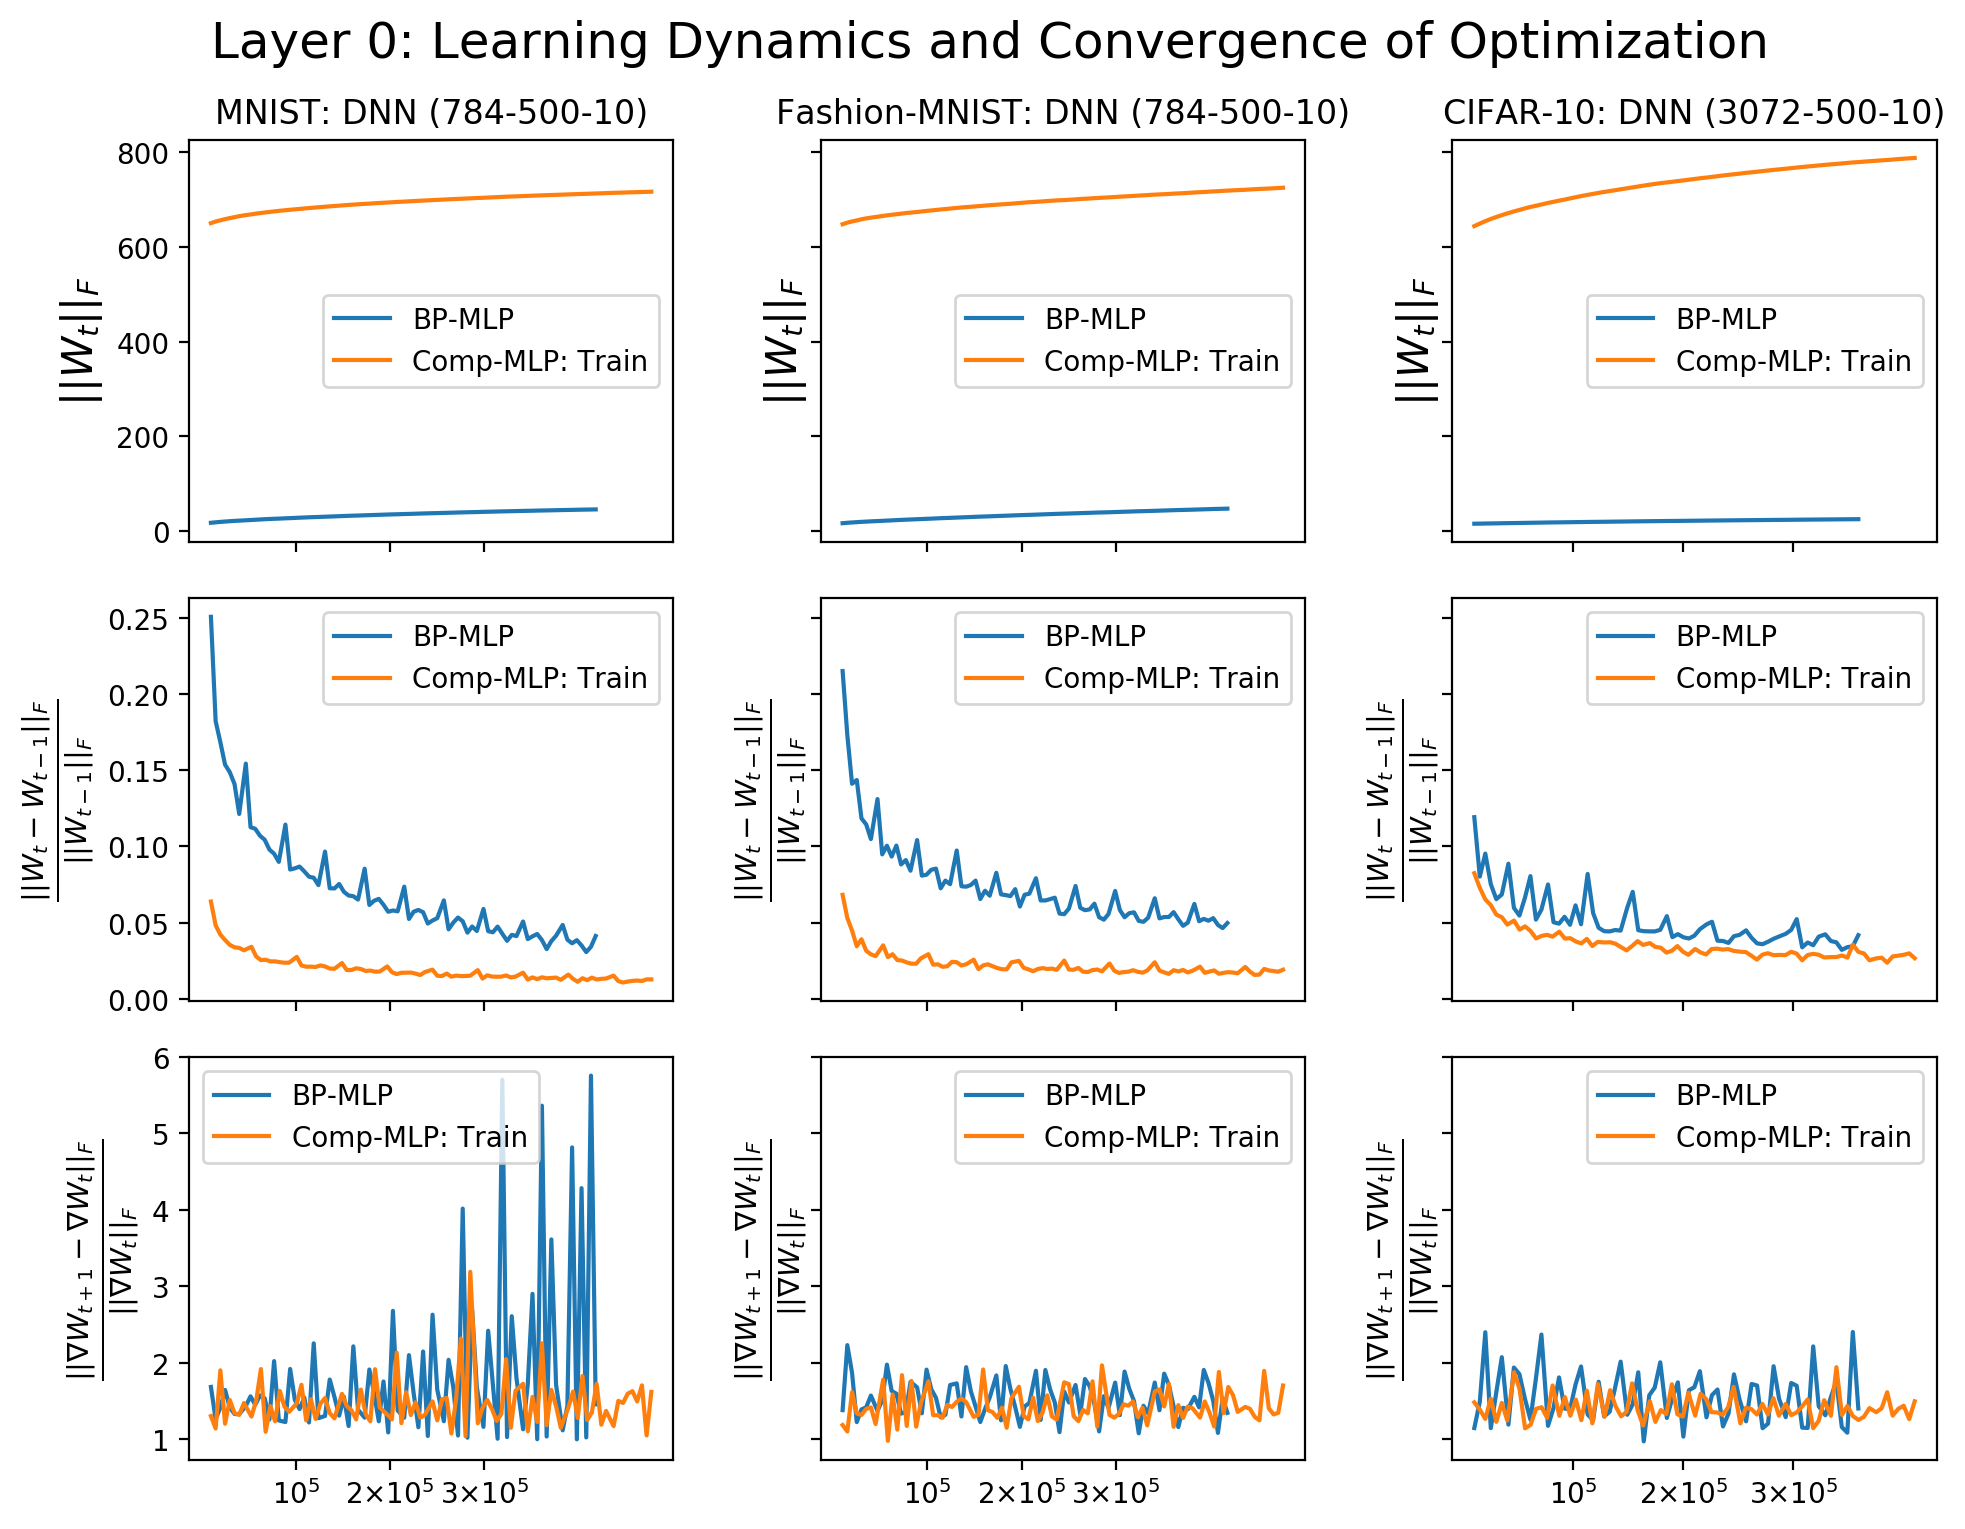

In [10]:
plot_weight_dev(iters, 0, fr_n_weights, fr_n_weights_ch, fr_n_weights_grad_ch,
                'Layer 0: Learning Dynamics and Convergence of Optimization',
                sub_titles, labels,
                save_fname=fig_dir + "/dynamics_l0.png")

In [11]:
plot_weight_dev(iters, 2, fr_n_weights, fr_n_weights_ch, fr_n_weights_grad_ch, 
                'Layer 1: Learning Dynamics and Convergence of Optimization',
                save_fname=fig_dir + "/dynamics_l1.png")

TypeError: plot_weight_dev() missing 2 required positional arguments: 'sub_titles' and 'labels'

### Visualize BO Evaluation Distribution - Hyperparameter Robustness

In [2]:
mnist_bo_log = 'logs/bo_logs_dnn_mnist.json'
fashion_bo_log = 'logs/bo_logs_dnn_fashion.json'
cifar10_bo_log = 'logs/bo_logs_dnn_cifar10.json'

In [5]:
dnn_mnist_acc = get_accuracies_bo_log(mnist_bo_log)
dnn_fashion_acc = get_accuracies_bo_log(fashion_bo_log)
dnn_cifar10_acc = get_accuracies_bo_log(cifar10_bo_log)

bo_data = [[dnn_mnist_acc, dnn_fashion_acc, dnn_cifar10_acc]]

In [20]:
plot_bo_results(bo_data, "Bayesian Optimization: 3-Fold CV Test Accuracies",
                save_fname="figures/bayes_opt_comparison.png")

TypeError: plot_bo_results() got multiple values for argument 'save_fname'